<a href="https://colab.research.google.com/github/RAIANKIT07/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/netflix_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CAPSTONE PROJECT 4 - NETFLIX MOVIES AND TV SHOWS CLUSTERING 
#(Unsupervised ML Capstone Project)

Submitted By :- ANKIT RAI



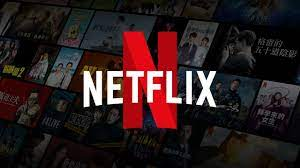

# Project Summary -

Since 2006, Netflix has been experimenting with data, attempting to estimate how much a viewer will like a movie based on previous choices.

The exact recommendations of the Netflix Recommendation Engine account for 80% of Netflix viewer engagement.

The NRE is estimated to be worth a billion dollars.

Clustering is important in the development of recommendation engines because it allows comparable information and people to be grouped together to forecast user preferences.

# GitHub Link -

# Problem Statement


This dataset contains TV episodes and movies that are currently accessible on Netflix as of 2019. The data was gathered through Flixable, a third-party Netflix search engine.
In 2018, they published an intriguing analysis revealing that the amount of TV series available on Netflix has nearly tripled since 2010. Since 2010, the number of movies on the streaming service has declined by almost 2,000 titles, while the number of TV episodes has nearly tripled. It will be fascinating to see what additional insights can be extracted from the same information.
Integrating this information with additional external datasets such as IMDB ratings and rotten tomatoes can yield a plethora of fascinating results.

# In this project, we will use Netflix Content Data to: 
1. Understand patterns and acquire insights into the content available on Netflix.

2. Recognize the types of content available in various countries.

3. Determine whether Netflix has been focused more on TV series than movies.

4. Group comparable items based on textual characteristics.
Engines that assist group comparable content and individuals together to forecast user preferences.

# we have included followinng step:-

Data Exploratory Data Analysis

Understanding what type content is available in different countries

Is Netflix has increasingly focusing on TV rather than movies in recent years.

Clustering similar content by matching text-based features



# Attribute Information
show_id : Unique ID for every Movie / Tv Show

type : Identifier - A Movie or TV Show

title : Title of the Movie / Tv Show

director : Director of the Movie

cast : Actors involved in the movie / show

country : Country where the movie / show was produced

date_added : Date it was added on Netflix

release_year : Actual Releaseyear of the movie / show

rating : TV Rating of the movie / show

duration : Total Duration - in minutes or number of seasons

listed_in : Genere

description: The Summary description

#1. Exploratory Data Analysis

In [154]:
#Importing Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O, data manipulation 
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from pandas import set_option
plt.style.use('ggplot') # nice plots
from matplotlib.pyplot import figure
     
#Importing sklearn
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings('ignore')


In [155]:
#Importing plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

In [156]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [157]:
#Loading our dataset from gogle drive and creating a pandas dataframe
df = pd.read_csv("/content/drive/MyDrive/netflix/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

In [158]:
#Exploring first 5 rows for better understanding of data
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [159]:
#Curiously exploring last 5 rows of dataset using tail()
df.tail()
     

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

#Exploring features name

In [160]:
#Getting feature names
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [161]:
#Looking for total no. of observations and features
df.shape


(7787, 12)

We have around 7787 rows of records and 12 features.

In [162]:
# Checking info our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


We can see that the majority of the data is in object format.

And other features are missing from some of the records.

#Data Cleaning

Missing values

In [163]:
# looking out exact missing values in our dataset in every features using isnull()
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

We have 5 following features having missing values

1.Director

2.Cast

3.Country

4.Date_added

5.Rating


Duplicated Values

In [164]:
# we will use duplicated for checking duplicate values 
df.duplicated().sum()

0

Making a copy of our dataframe for further operations

In [165]:
# Making copy of our dataframe
df_1 = df.copy()
     

Filling null values with "unknown"

In [166]:
# Filling all the missing values with unknown
df_1.fillna("Unknown",inplace=True)
     

In [167]:
# checking again after filling null values
df_1.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

we have filled missing values with unknown.

#Descriptive Staistics

In [168]:
# we will check numerical columns
df_1.describe()

release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000

We may state that very old Netflix content was released in 1925, with the majority of the content produced in 2017.

In [169]:
# Checking data types again
df_1.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

#Data Visualization

#Some Feature Engineering required For Data Visualization


converting date_added column datatype to datetime

In [170]:
#Getting records from date_added column excluding 'unknown'
df_1 = df_1.loc[df_1['date_added']!= 'Unknown']
     

In [171]:
df_1.shape

(7777, 12)

In [172]:
#converting date_added column to datetime
df_1['date_added'] = pd.to_datetime(df_1['date_added'])

In [173]:
# Crosschecking
df_1.info()
     

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7777 non-null   object        
 1   type          7777 non-null   object        
 2   title         7777 non-null   object        
 3   director      7777 non-null   object        
 4   cast          7777 non-null   object        
 5   country       7777 non-null   object        
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7777 non-null   int64         
 8   rating        7777 non-null   object        
 9   duration      7777 non-null   object        
 10  listed_in     7777 non-null   object        
 11  description   7777 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 789.9+ KB


our date_added column successfully converted into datetime type

Now we will extract Year, month and date from date_added column and create seperate columns for each for ease of operations.

In [174]:
#Creating 'year' column
df_1['added_year'] = df_1['date_added'].dt.year

In [175]:
#month
df_1['added_month'] = df_1['date_added'].dt.month

In [176]:
#day
df_1['added_day'] = df_1['date_added'].dt.day

renaming 'listed_in' column to 'genres'.

In [177]:
#first we rename the column for sake of simplicity
df_1.rename(columns={'listed_in':'genres'},inplace=True)
     


we will drop column 'date_added' as we create seperate columns for it according to year and month

In [178]:
#Dropping 'date_added' as we create seperate columns
df_1.drop(columns="date_added",axis=1,inplace=True)

Lets check all is going well or not...?

In [179]:
#Checking first 5 rows of our dataset 
df_1.head()

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   release_year rating   duration  \
0          2020  TV-MA  4 Seasons   
1          2016  TV-MA     93 min   
2          2011      R     78 min   
3          2009  PG-13     80 min   
4          2008  PG-13    123 min   

                                              genres  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  added_year  added_month  \
0  In a future where the elite inhabit an island ...        2020            8   
1  After a devastating earthquake hits Mexico Cit...        2016           12   
2  When an army recruit is found dead, his fellow...        2018           12   
3  In a postapocalyptic world, rag-doll robots hi...        2017           11   
4  A brilliant group of students become card-coun...        2020            1   

   added_day  
0         14  
1         23  
2         20  
3         16  
4          1

Okay till here everything is going good.....!

#Univariate Analysis

Type of show means movies/TV shows

In [180]:
# checking how many tv shows and movies are there  
df_1['type'].value_counts()

Movie      5377
TV Show    2400
Name: type, dtype: int64

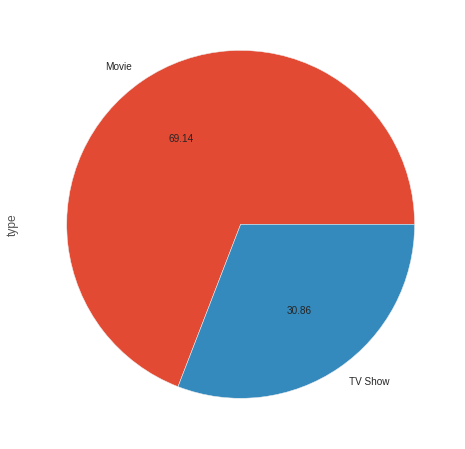

In [181]:
#Pie chart for type of shows
df_1['type'].value_counts().plot(kind='pie',autopct="%.2f")


'Love', 'Christmas', 'World', 'Story', 'Man', 'Live', 'Girl', 'Life' these are the most appeared words in titles of Movies and TV shows.

#Genres

In [182]:
#Copying main dataframe for exploring genres
genres_explore = df_1.copy()

In [183]:
#we will split genres column
genres_explore = pd.concat([genres_explore, df_1["genres"].str.split(",", expand = True)], axis = 1)


In [184]:
#We will check genres_explore
genres_explore

show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0               Unknown  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784            Unknown                                            Nasty C   
7785            Unknown                         Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                            Unknown   

                                                country  release_year rating  \
0                                                Brazil          2020  TV-MA   
1                                                Mexico          2016  TV-MA   
2                                             Singapore          2011      R   
3                                         United States          2009  PG-13   
4                                         United States          2008  PG-13   
...                                                 ...           ...    ...   
7782  Sweden, Czech Republic, United Kingdom, Denmar...          2005  TV-MA   
7783                                              India          2015  TV-14   
7784                                            Unknown          2019  TV-MA   
7785                                          Australia          2019  TV-PG   
7786              United Kingdom, Canada, United States          2019  TV-MA   

       duration                                             genres  \
0     4 Seasons  International TV Shows, TV Dramas, TV Sci-Fi &...   
1        93 min                       Dramas, International Movies   
2        78 min                Horror Movies, International Movies   
3        80 min  Action & Adventure, Independent Movies, Sci-Fi...   
4       123 min                                             Dramas   
...         ...                                                ...   
7782     99 min                       Dramas, International Movies   
7783    111 min     Dramas, International Movies, Music & Musicals   
7784     44 min  Documentaries, International Movies, Music & M...   
7785   1 Season                 International TV Shows, Reality TV   
7786     90 min                    Documentaries, Music & Musicals   

                                            description  added_year  \
0     In a future where the elite inhabit an island ...        2020   
1     After a devastating earthquake hits Mexico Cit...        2016   
2     When an army recruit is found dead, his fellow...        2018   
3     In a postapocalyptic world, rag-doll robots hi...        2017   
4     A brilliant group of students become card-coun...        2020   
...                                            

In [185]:
#Melting the required features
genres_explore = genres_explore.melt(id_vars = ['type','title'], value_vars=range(3),value_name="genres")
genres_explore = genres_explore[genres_explore['genres'].notna()]
genres_explore

type              title variable                         genres
0      TV Show                 3%        0         International TV Shows
1        Movie               7:19        0                         Dramas
2        Movie              23:59        0                  Horror Movies
3        Movie                  9        0             Action & Adventure
4        Movie                 21        0                         Dramas
...        ...                ...      ...                            ...
23321  TV Show        Zombie Dumb        2                    TV Comedies
23323  TV Show          Zona Rosa        2   Stand-Up Comedy & Talk Shows
23324    Movie                Zoo        2           International Movies
23327    Movie             Zubaan        2               Music & Musicals
23328    Movie  Zulu Man in Japan        2               Music & Musicals

[17051 rows x 4 columns]

In [186]:
#counting top 30 genres by occurence
genres_explore['genres'].value_counts()[:30]

 International Movies         2323
Dramas                        1384
Comedies                      1074
Documentaries                  751
 Dramas                        722
Action & Adventure             721
International TV Shows         689
 Independent Movies            653
 TV Dramas                     641
 Romantic Movies               528
 International TV Shows        509
Children & Family Movies       502
 Thrillers                     442
 TV Comedies                   409
 Comedies                      397
Crime TV Shows                 369
Kids' TV                       357
Stand-Up Comedy                321
 Romantic TV Shows             305
 Music & Musicals              304
Horror Movies                  244
British TV Shows               231
 Sci-Fi & Fantasy              207
 Sports Movies                 195
Docuseries                     193
 Docuseries                    159
 Korean TV Shows               150
Anime Series                   147
 Spanish-Language TV

In [187]:
#Stripping the equired records
genres_explore['genres']=genres_explore['genres'].str.strip()
genres_explore['genres'].value_counts()[:20]

International Movies        2437
Dramas                      2106
Comedies                    1471
International TV Shows      1198
Documentaries                786
Action & Adventure           721
TV Dramas                    703
Independent Movies           673
Children & Family Movies     532
Romantic Movies              531
TV Comedies                  518
Thrillers                    491
Crime TV Shows               426
Kids' TV                     412
Docuseries                   352
Romantic TV Shows            333
Stand-Up Comedy              329
Music & Musicals             321
Horror Movies                312
British TV Shows             231
Name: genres, dtype: int64

#Top 20 Genres

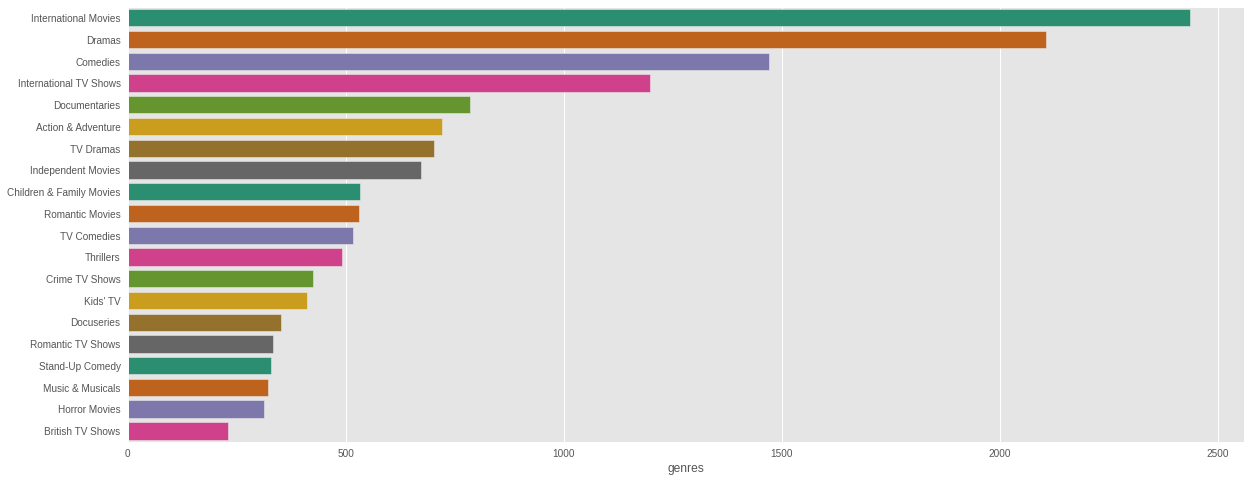

In [188]:
#Plotting a barplot for getting top 20 genres
plt.figure(figsize = (20, 8))
listed_in = genres_explore["genres"].value_counts()[:20]
sns.barplot(x = listed_in, y = listed_in.index, palette = "Dark2")

Here 'International Movies' are the top most occured genres with around 2400 times occured, followed by 'Dramas' and 'Comedies' with approximately 2100 and 1500 respectively.

In [189]:
#creating another dataframe for plotting genres treemap
df_genre = pd.DataFrame(genres_explore.genres.value_counts()).reset_index().rename(columns={'index':'genre', 'genres':'count'})

In [190]:
#Plotting a Treemap using plotly
fig_tree = px.treemap(df_genre, path=[px.Constant("Distribution of Geners"), 'count','genre'])
fig_tree.update_layout(title='Highest watched Geners on Netflix',
                  margin=dict(t=50, b=0, l=70, r=40),
                  plot_bgcolor='#333', paper_bgcolor='#333',
                  title_font=dict(size=25, color='#fff', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'),
                  hoverlabel=dict(bgcolor="#444", font_size=13, font_family="Lato, sans-serif"))
     

The top categories are 'International Movies,' 'Dramas,' 'Comedies,' 'International TV programmes,' 'Documentaries,' 'Action & Adventures,' 'TV Dramas,' 'Independent Movies,' and 'Children and Family Movies,' according to the above treemap.

'Classic and cult television,' 'TV thrillers,' 'Anime Features,' and 'Faith & Spirituality' are all in the minority.

Obtaining column names for future operations

In [191]:
df_1.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country',
       'release_year', 'rating', 'duration', 'genres', 'description',
       'added_year', 'added_month', 'added_day'],
      dtype='object')

#Content Addition

Monthwise content addition

In [192]:
#counting no. of contents added every month
df_1.added_month.value_counts()

12    833
10    785
1     757
11    738
3     669
9     619
8     618
4     601
7     600
5     543
6     542
2     472
Name: added_month, dtype: int64

Text(0.5, 1.0, 'Monthwise content addition')

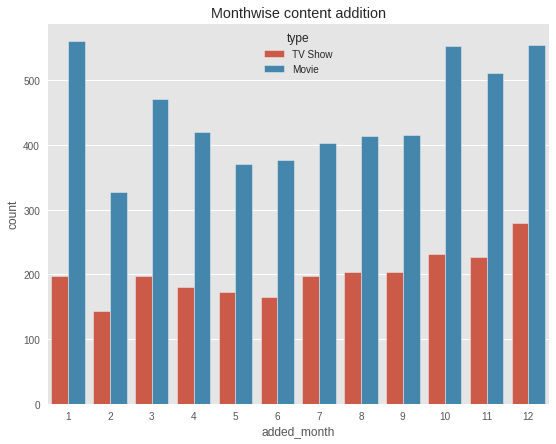

In [193]:
#Plotting a countplot for getting better insights from monthwise addition
plt.figure(figsize=(9,7))
sns.countplot(x='added_month',hue='type',data=df_1)
plt.title("Monthwise content addition")

we can clearly observe that on "January", "October" and in "December" there is more stuff added on netflix.

And in "February," there was relatively little substance added.

Plotting a bar chart to see how many movies/shows have been added on average on each month's days.

Text(0.5, 1.0, 'Daywise content addition')

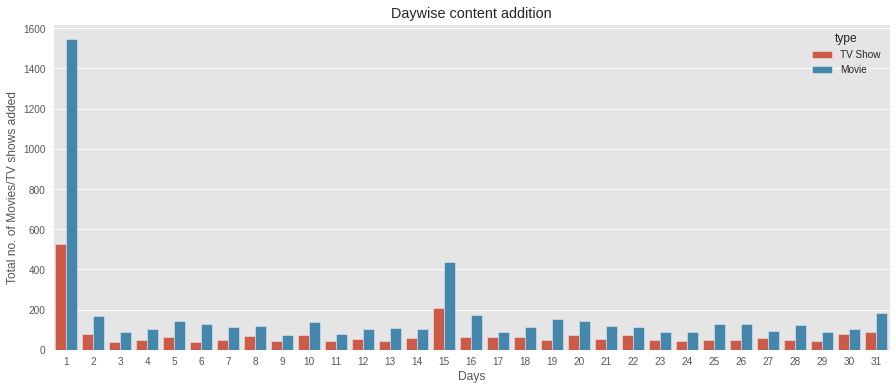

In [194]:
plt.figure(figsize=(15,6))
sns.countplot(x='added_day',hue='type',data=df_1)
plt.xlabel('Days')
plt.ylabel('Total no. of Movies/TV shows added')
plt.title("Daywise content addition")

We can easily see that Netflix adds a lot of content on the first of every month.

And there is another day, the 15th, in the middle of the month, that has the second greatest amount of contents added to it.

#Ratings

Netflix Rating of Movies/TV Shows based on content:-

TV-MA :for Mature Audiences

R : Restricted

PG-13 : Parents strongly cautioned. May be Inappropriate for ages 12 and under

TV-14 : Parents strongly cautioned. May not be suitable for ages 14 and under

TV-PG : Parental Guidance suggested

NR : Not Rated

TV-G : Suitable for General Audiences

TV-Y : Designed to be appropriate for all children

PG : Parental Guidance suggested

G : Suitable for General Audiences

NC-17 : the content isn't suitable for children under 17 and younger

TV-Y7-FV : Suitable for ages 7 and up

UR : Unrated

In [195]:
#counting all type ratings
df_1.rating.value_counts().reset_index().rename(columns={'index':'Rating','rating':'Count'})

Rating  Count
0      TV-MA   2861
1      TV-14   1928
2      TV-PG    804
3          R    665
4      PG-13    386
5       TV-Y    279
6      TV-Y7    270
7         PG    247
8       TV-G    194
9         NR     83
10         G     39
11   Unknown      7
12  TV-Y7-FV      6
13        UR      5
14     NC-17      3

#Rating Countplot


Text(0.5, 1.0, 'Movies/TV shows - Rating wise')

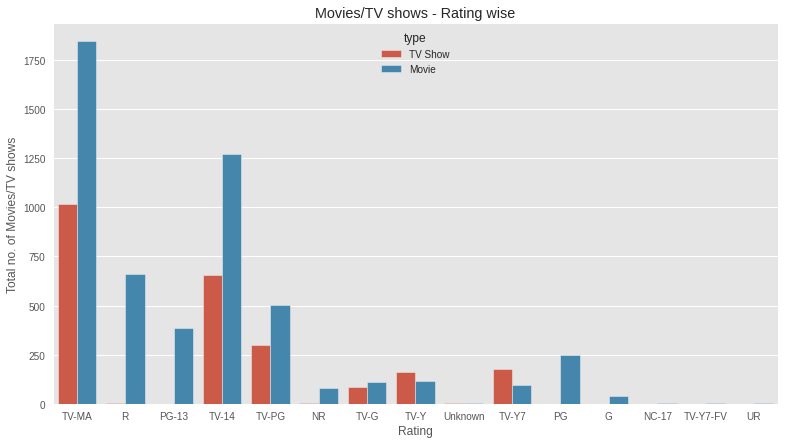

In [196]:
#Plotting a countplot to get in depth analysis from ratings
plt.figure(figsize=(13,7))
sns.countplot(x='rating',hue='type',data=df_1)
plt.xlabel('Rating')
plt.ylabel('Total no. of Movies/TV shows')
plt.title("Movies/TV shows - Rating wise")

We can observe that the majority of content for mature adults (TV-MA) is found in both TV shows and movies.

Then, for children under the age of 14, TV-14 is the most popular, and parents are strongly advised to avoid it.

G rating, which signifies suitable for general audience, is assigned to a very small number of content, implying that there is very little stuff that is suitable for everyone.

#Text Visualization
We will work on Description column

In [197]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [198]:
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

We will define a function to remove stop words

In [199]:
def delete_stopwords(description):
    '''
    This is function which will take the text data as input and delets the stopwords from it.
    '''
    
    # We will use a list comprehension 
    clean_text = [i.lower() for i in description.split() if i.lower() not in stop_words]
    # joining the list of words with space separator
    return " ".join(clean_text)

#Cleaning Text

In [200]:
#Now we will apply this function our 'Description' column

df_1['description']=df_1['description'].apply(delete_stopwords)
df_1['description'][0:2]

0    future elite inhabit island paradise far crowd...
1    devastating earthquake hits mexico city, trapp...
Name: description, dtype: object

In [201]:
#importing string
import string

In [202]:
#Defining a function to remove the punctuation
def remove_punctuations(text):
    '''
    This function takes input text and removes punctuation marks from it
    '''
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
     

In [203]:
#Now we will apply this function on 'Description' column
df_1['description']=df_1['description'].apply(remove_punctuations)

We removed the punctuation marks from decription column, now we will once check by calling some of the top rows

In [204]:
df_1['description'][0:6]

0    future elite inhabit island paradise far crowd...
1    devastating earthquake hits mexico city trappe...
2    army recruit found dead fellow soldiers forced...
3    postapocalyptic world ragdoll robots hide fear...
4    brilliant group students become cardcounting e...
5    genetics professor experiments treatment comat...
Name: description, dtype: object

Now we will remove punctuations and stop_words from 'genres' column

In [205]:
#we will use count vectorizer
count_vectorizer = CountVectorizer()
count_vectorizer.fit(df_1['description'])
word_count = count_vectorizer.vocabulary_.items()

In [206]:
#we will make a list of word count
list_words = list(word_count)


We will now arrange the words with their occurences

In [207]:
#We will store the words and their counts in respective lists
words = []
counts = []
for key, value in word_count:
  words.append(key)
  counts.append(value)

In [208]:
#creating a dataframe for word counts
vocabulary = pd.DataFrame({"words":words,"counts":counts})
vocabulary = vocabulary.sort_values("counts",ascending=False)
vocabulary

words  counts
18910      şeref   19646
10424      ōarai   19645
12415     łukasz   19644
11138  überelite   19643
11711       über   19642
...          ...     ...
8351        1000       4
646          100       3
7646          10       2
7993         009       1
6897         007       0

[19647 rows x 2 columns]

In [209]:
#exploring first 5 rows
vocabulary.head(5)

words  counts
18910      şeref   19646
10424      ōarai   19645
12415     łukasz   19644
11138  überelite   19643
11711       über   19642

In [210]:
#exploring last 5 rows
vocabulary.tail()
     

words  counts
8351  1000       4
646    100       3
7646    10       2
7993   009       1
6897   007       0

In [211]:
#Resetting index and droping index column
vocabulary.reset_index(inplace=True)
vocabulary.drop(columns={"index"},inplace=True)

#Top 10 most occured words

In [212]:
vocabulary[0:10]

words  counts
0      şeref   19646
1      ōarai   19645
2     łukasz   19644
3  überelite   19643
4       über   19642
5       ömer   19641
6      émile   19640
7      ángel   19639
8     álvaro   19638
9       álex   19637

we will plot top 10 most occured words

In [213]:
top_10 = vocabulary.head(10)
top_10_words = top_10.words.values
top_10_word_count = top_10.counts.values

In [214]:
# array of top 10 words
top_10_words
     

array(['şeref', 'ōarai', 'łukasz', 'überelite', 'über', 'ömer', 'émile',
       'ángel', 'álvaro', 'álex'], dtype=object)

In [215]:
# count of top 10 words
top_10_word_count

array([19646, 19645, 19644, 19643, 19642, 19641, 19640, 19639, 19638,
       19637])

<BarContainer object of 10 artists>

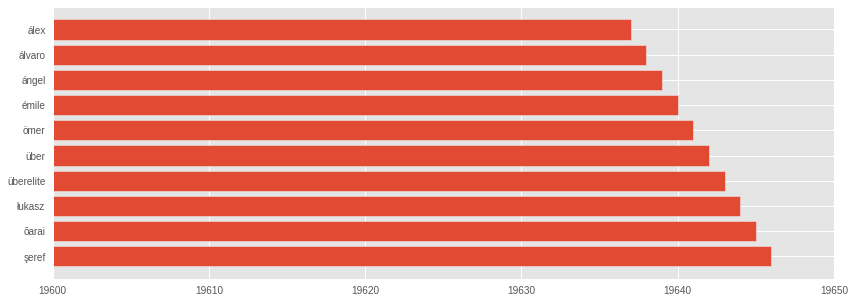

In [216]:
# Horizontal bar plot of top 10 most occured bar plot
plt.figure( figsize = ( 14,5 ))
plt.xlim(19600,19650)
plt.barh(top_10_words , top_10_word_count )

#Stemming

Because we can observe that the majority of the words are from languages other than English, we will use Snowball stemmer -

Non-English words can also be mapped using the Snowball Stemmer. Snowball Stemmers is a multi-lingual stemmer since it supports various languages.

In [217]:
#Stemming
stemming = SnowballStemmer("english")

In [218]:
#Defining a function for splitting the strings in description column and applying stemming on words and then joining them
def stemming_words(description):    
    '''a function which stems each word in the given text'''
    description = [stemming.stem(word) for word in description.split()]
    return " ".join(description)
     

In [219]:
#Applying stemming function which is defined above on description column
df_1['description'] = df_1['description'].apply(stemming_words)
df_1.head()

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   release_year rating   duration  \
0          2020  TV-MA  4 Seasons   
1          2016  TV-MA     93 min   
2          2011      R     78 min   
3          2009  PG-13     80 min   
4          2008  PG-13    123 min   

                                              genres  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  added_year  added_month  \
0  futur elit inhabit island paradis far crowd sl...        2020            8   
1  devast earthquak hit mexico citi trap survivor...        2016           12   
2  armi recruit found dead fellow soldier forc co...        2018           12   
3  postapocalypt world ragdol robot hide fear dan...        2017           11   
4  brilliant group student becom cardcount expert...        2020            1   

   added_day  
0         14  
1         23  
2         20  
3         16  
4          1

In [220]:
#Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

#Fit the vectorizer using the text data
tfid_vectorizer.fit(df_1['description'])

#Collect the vocabulary items used in the vectorizer
vocabulary_1 = tfid_vectorizer.vocabulary_.items()

In [221]:
#Lists to store the vocab and counts
words_1 = []
count_of_words = []
#Iterate through each vocab and count append the value to designated lists
for key, value in vocabulary_1:
    words_1.append(key)
    count_of_words.append(value)

#Words after stemming



In [222]:
#Creating a dataframe of words after stemming
words_after_stemming = pd.DataFrame({"Word":words_1,
                                     "Count":count_of_words})
words_after_stemming = words_after_stemming.sort_values("Count",ascending=False)

In [223]:
#Exploring top 10 most occured words in description column after stemming
top10_words_after_stemming = words_after_stemming.head(10)

In [224]:
top10_most_occured_stemmed_words = top10_words_after_stemming.Word.values
top10_count_of_most_occured_stemmed_words = top10_words_after_stemming.Count.values

In [225]:
top10_count_of_most_occured_stemmed_words
     

array([14280, 14279, 14278, 14277, 14276, 14275, 14274, 14273, 14272,
       14271])

#Top 10 most occured words after stemming

<BarContainer object of 10 artists>

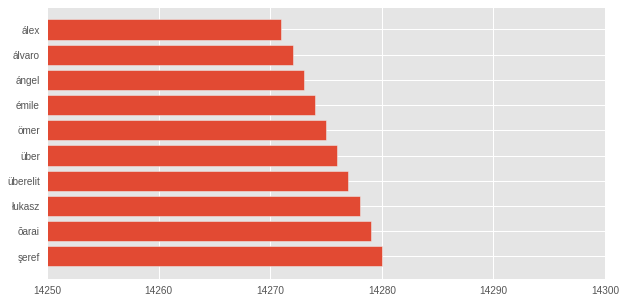

In [226]:
#plotting a horizontal bar chart
plt.figure( figsize = ( 10,5 ))
plt.xlim(14250, 14300)
plt.barh(top10_most_occured_stemmed_words , top10_count_of_most_occured_stemmed_words )

In above bar chart we can see that most occured words are non-english.

#Multivariate Analysis

#2. Understanding what type content is available in different countries

Exploring Countries

splitting country columns as single observation contains multiple country names

In [227]:
#Creating a different country dataframe
country_count = df_1.copy()
country_count = pd.concat([country_count , df_1['country'].str.split(",",expand=True)],axis=1)
country_count
     

show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0               Unknown  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784            Unknown                                            Nasty C   
7785            Unknown                         Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                            Unknown   

                                                country  release_year rating  \
0                                                Brazil          2020  TV-MA   
1                                                Mexico          2016  TV-MA   
2                                             Singapore          2011      R   
3                                         United States          2009  PG-13   
4                                         United States          2008  PG-13   
...                                                 ...           ...    ...   
7782  Sweden, Czech Republic, United Kingdom, Denmar...          2005  TV-MA   
7783                                              India          2015  TV-14   
7784                                            Unknown          2019  TV-MA   
7785                                          Australia          2019  TV-PG   
7786              United Kingdom, Canada, United States          2019  TV-MA   

       duration                                             genres  ...  \
0     4 Seasons  International TV Shows, TV Dramas, TV Sci-Fi &...  ...   
1        93 min                       Dramas, International Movies  ...   
2        78 min                Horror Movies, International Movies  ...   
3        80 min  Action & Adventure, Independent Movies, Sci-Fi...  ...   
4       123 min                                             Dramas  ...   
...         ...                                                ...  ...   
7782     99 min                       Dramas, International Movies  ...   
7783    111 min     Dramas, International Movies, Music & Musicals  ...   
7784     44 min  Documentaries, International Movies, Music & M...  ...   
7785   1 Season                 International TV Shows, Reality TV  ...   
7786     90 min                    Documentaries, Music & Musicals  ...   

                    2         3             4     5     6     7     8     9  \
0                None      None          None  None  None  None  None  None   
1                None      None          None  None  None  None  None  None   
2                None      None          None  None  None  None  None  None   
3                None      None          None  None  None  None  None  None   
4                N

In [228]:
#keeping only few features that we want here
country_count = country_count.melt(id_vars = ["type", "title","genres",'rating','description'], value_vars = range(12), value_name = "country")
country_count = country_count[country_count["country"].notna()]
country_count

type                title  \
0      TV Show                   3%   
1        Movie                 7:19   
2        Movie                23:59   
3        Movie                    9   
4        Movie                   21   
...        ...                  ...   
68821    Movie  The Look of Silence   
70723    Movie             Barbecue   
76598    Movie  The Look of Silence   
78500    Movie             Barbecue   
86277    Movie             Barbecue   

                                                  genres rating  \
0      International TV Shows, TV Dramas, TV Sci-Fi &...  TV-MA   
1                           Dramas, International Movies  TV-MA   
2                    Horror Movies, International Movies      R   
3      Action & Adventure, Independent Movies, Sci-Fi...  PG-13   
4                                                 Dramas  PG-13   
...                                                  ...    ...   
68821                Documentaries, International Movies  PG-13   
70723                Documentaries, International Movies  TV-MA   
76598                Documentaries, International Movies  PG-13   
78500                Documentaries, International Movies  TV-MA   
86277                Documentaries, International Movies  TV-MA   

                                             description variable  \
0      futur elit inhabit island paradis far crowd sl...        0   
1      devast earthquak hit mexico citi trap survivor...        0   
2      armi recruit found dead fellow soldier forc co...        0   
3      postapocalypt world ragdol robot hide fear dan...        0   
4      brilliant group student becom cardcount expert...        0   
...                                                  ...      ...   
68821  societi terror silenc brother 1960s indonesian...        8   
70723  blend cultur nuanc mesmer techniqu add flavor ...        9   
76598  societi terror silenc brother 1960s indonesian...        9   
78500  blend cultur nuanc mesmer techniqu add flavor ...       10   
86277  blend cultur nuanc mesmer techniqu add flavor ...       11   

              country  
0              Brazil  
1              Mexico  
2           Singapore  
3       United States  
4       United States  
...               ...  
68821         Germany  
70723          Sweden  
76598     Netherlands  
78500   United States  
86277         Uruguay  

[9564 rows x 7 columns]

Counting no. of unique countries

In [229]:
#counting no. of unique countries using nunique() function
country_count['country'].nunique()

189

There are total 189 unique countries

counting occurences of countries

In [230]:
#counting occurences of countries by using value_counts
country_count['country'].value_counts()[:20]

United States      2877
India               956
United Kingdom      576
Unknown             506
 United States      414
Canada              259
Japan               236
France              196
South Korea         194
Spain               168
 France             153
 Canada             153
 United Kingdom     146
Mexico              123
Australia           107
 Germany            107
Turkey              106
Egypt               105
Germany              92
China                86
Name: country, dtype: int64

Some countries appear twice in this list, thus we will remove them.

In [231]:
#stripping of the country column
country_count["country"] = country_count["country"].str.strip()

storing top 20 countries

In [232]:
#creating a new dataframe
top_20_countries= country_count["country"].value_counts()[:20].reset_index().rename(columns={'index':'country','country':'count'})

Barplot of top 20 countries

In [233]:
top_20_countries

country  count
0    United States   3291
1            India    990
2   United Kingdom    722
3          Unknown    506
4           Canada    412
5           France    349
6            Japan    286
7            Spain    215
8      South Korea    212
9          Germany    199
10          Mexico    154
11           China    147
12       Australia    143
13           Egypt    110
14          Turkey    108
15       Hong Kong    102
16           Italy     90
17          Brazil     88
18         Belgium     85
19          Taiwan     85

converting country names to list

In [234]:
#Converting country names to list using tolist
list_top20_countries = top_20_countries['country'].tolist()

In [235]:
list_top20_countries 

['United States',
 'India',
 'United Kingdom',
 'Unknown',
 'Canada',
 'France',
 'Japan',
 'Spain',
 'South Korea',
 'Germany',
 'Mexico',
 'China',
 'Australia',
 'Egypt',
 'Turkey',
 'Hong Kong',
 'Italy',
 'Brazil',
 'Belgium',
 'Taiwan']

#Genres VS Countries

In [236]:
#word cloud for user rating review
def word_count_country(category):
    df_word_cloud = country_count[['country','genres']].dropna()
    df_word_cloud = df_word_cloud[df_word_cloud['country']==category]
    text = " ".join(word for word in df_word_cloud['genres'])
    # Create stopword list:
    stopwords = set(STOPWORDS)
  # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Display the generated image:
  # the matplotlib way:
    plt.rcParams["figure.figsize"] = (9,5)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

Here in above word cloud we can see different genres in top 20 countries

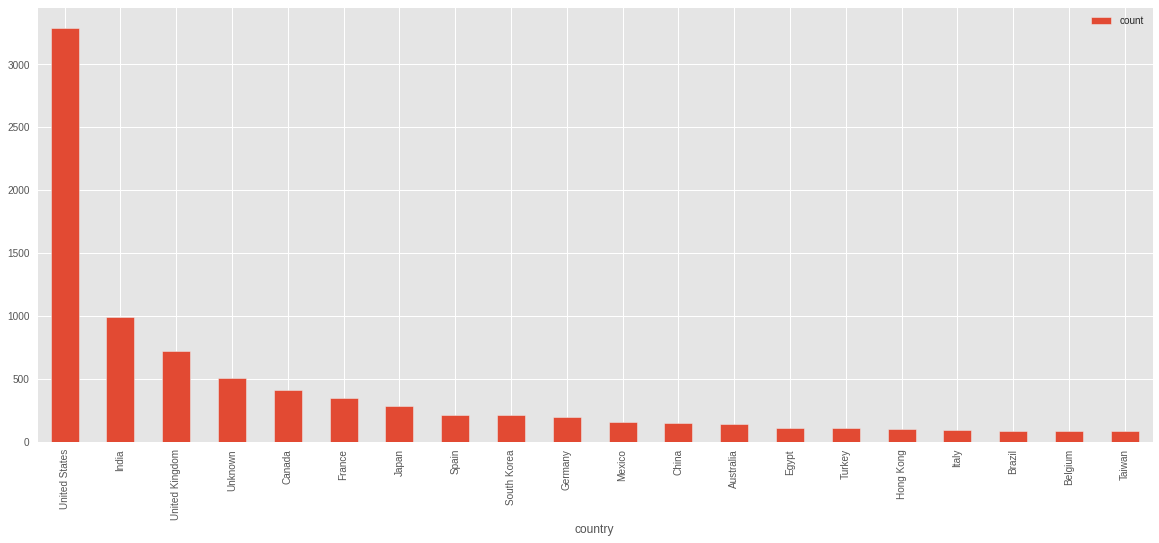

In [237]:
top_20_countries.plot(x="country", y="count", kind="bar")

#Ratings VS Countries

In [238]:
#defining a function
def barplot_rating(country_name):
  '''
  it will take a country name and return the rating count
  '''
  plt.figure(figsize=(7,5))
  from seaborn.categorical import countplot
  sns.set_theme(style="white")
  ax = sns.countplot(x='rating',data=country_count[country_count['country']==country_name])
  ax.set_title(country_name)

Plotting the countplot for raings in top 20 countried

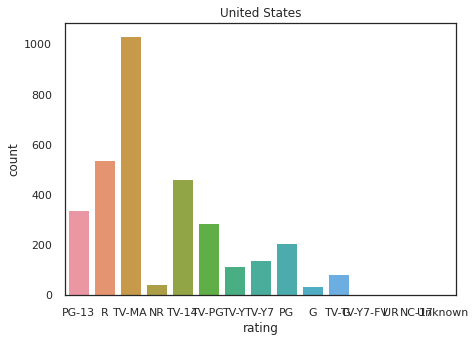

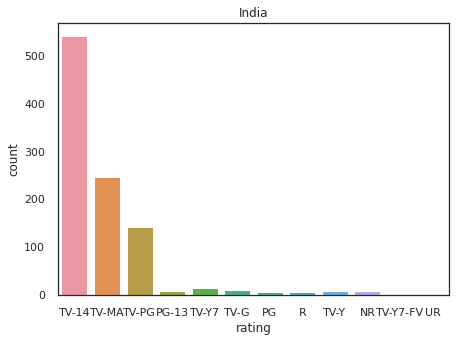

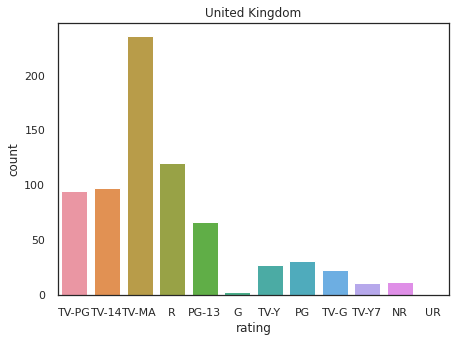

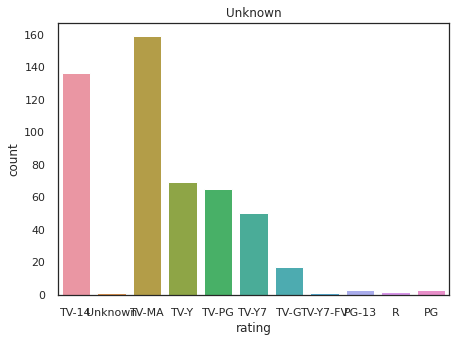

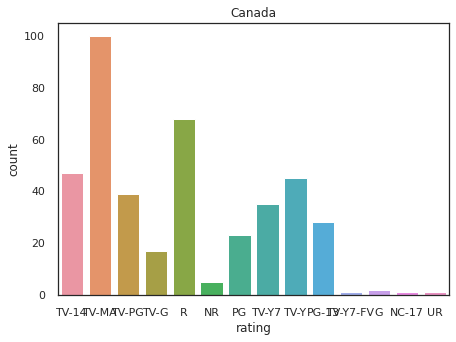

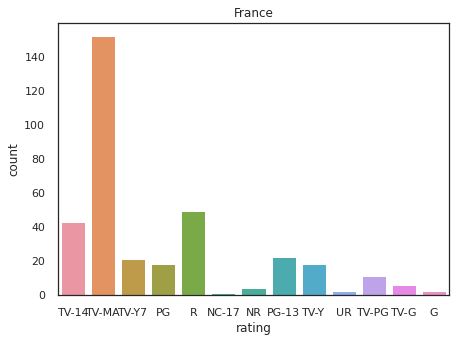

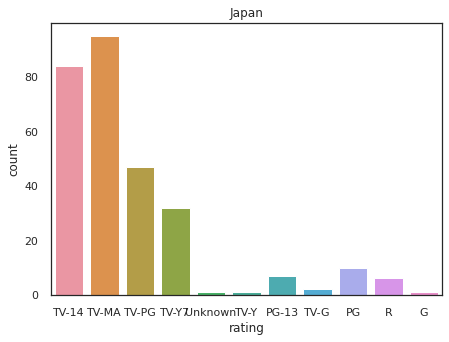

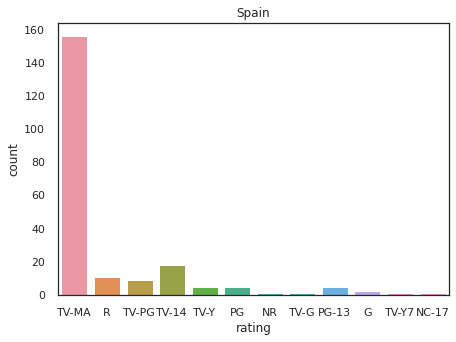

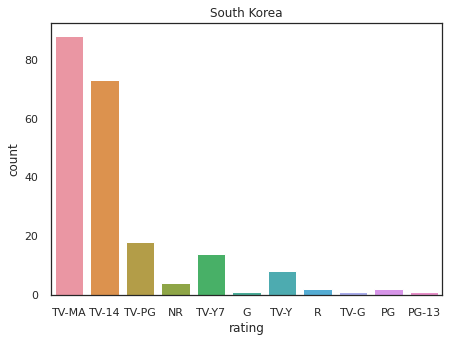

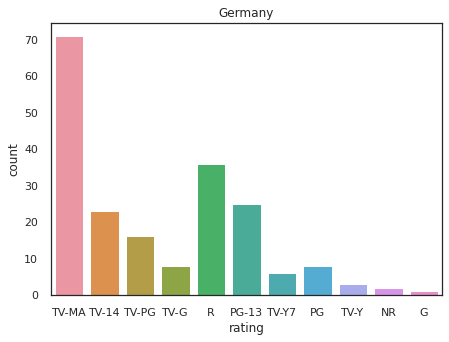

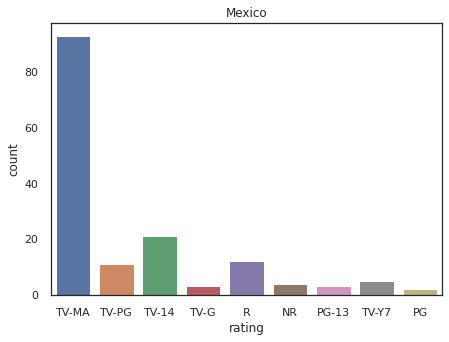

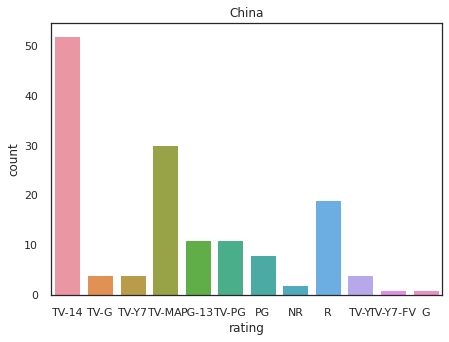

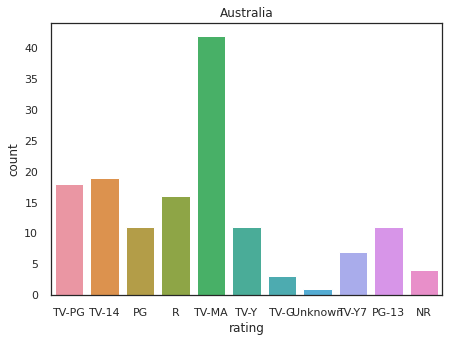

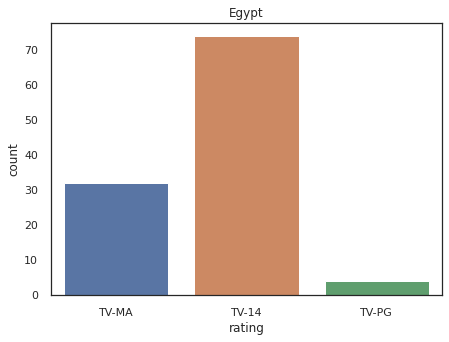

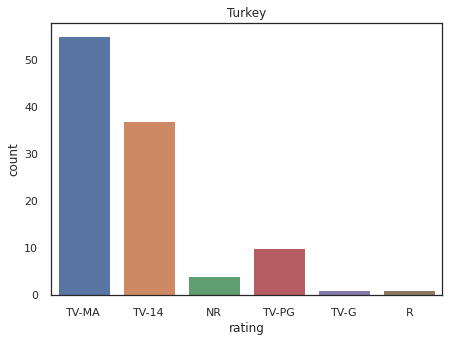

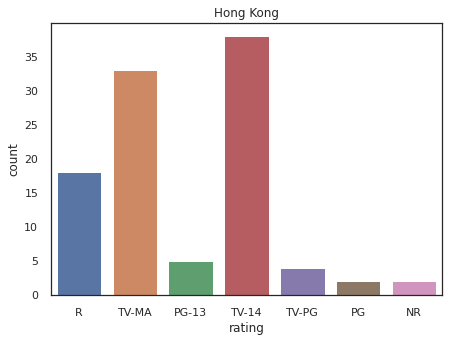

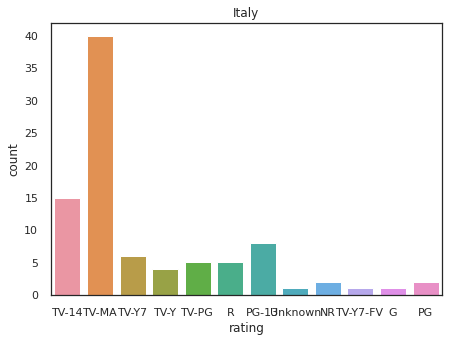

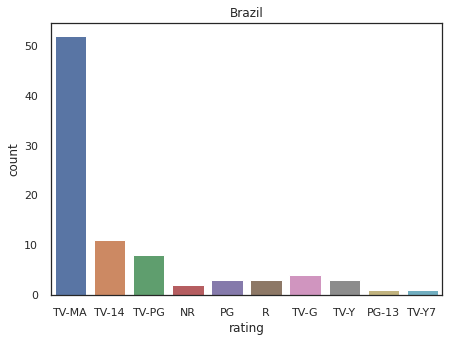

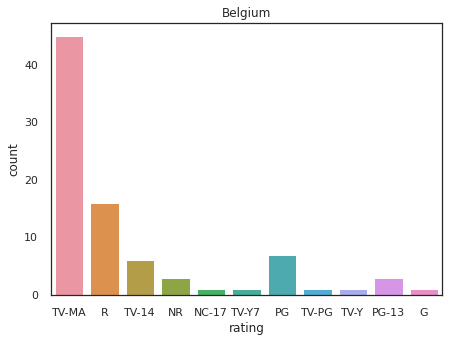

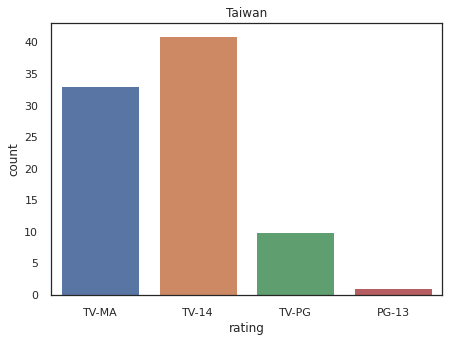

In [239]:
#Getting the country names one by one
for country_name in list_top20_countries:
  barplot_rating(country_name)
     

Shows with the highest TV-MA rating are found in Belgium, Brazil, Italy, Turkey, Australia, Mexico, Germany, South Korea, Spain, Japan, France, Canada, the United Kingdom, and the United States.

India, China, Egypt, Hong Kong, and Taiwan have the most TV-14 shows.

#Country vs Description

In [240]:
#word cloud for user rating review
def description_count_country(category):
    df_word_cloud = country_count[['country','description']].dropna()
    df_word_cloud = df_word_cloud[df_word_cloud['country']==category]
    text = " ".join(word for word in df_word_cloud['description'])
    # Create stopword list:
    stopwords = set(STOPWORDS)
  # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Display the generated image:
  # the matplotlib way:
    plt.rcParams["figure.figsize"] = (8,5)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In the above word cloud, we can observe numerous keywords from various nations and compare the kind of movies/tv shows available in these countries.

#Is Netflix has increasingly focusing on TV rather than movies in recent years ??

Netflix's focus in recent years

Text(0.5, 1.0, "Recent year Netflix's Uploads")

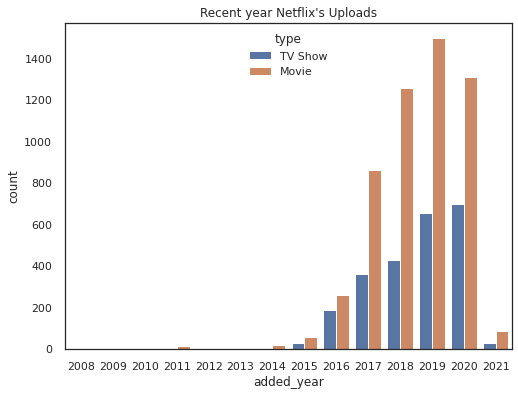

In [241]:
#Plotting a countplot                                       
plt.figure(figsize=(8,6))
sns.countplot(x='added_year',hue='type',data=df_1)
plt.title("Recent year Netflix's Uploads")

From the above countplot, we can clearly see that the number of movies added in 2017 climbed dramatically, but the number of TV shows added in 2017 increased significantly less than that of movies.

#4. Clustering similar content by matching text-based features

Feature Engineering

We will add all text based or categorical columns

In [242]:
# We will add all categorical and text based columns
df_1['text_info'] = df_1['description'] + ' '+ df_1['genres'] + ' ' + df_1['rating'] + ' '+ df_1['country']+ ' ' + df_1['title'] + ' '+ df_1['director'] + ' ' + df_1['cast']

In [243]:
#Checking 
df_1['text_info'][0]

'futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalor International TV Shows, TV Dramas, TV Sci-Fi & Fantasy TV-MA Brazil 3% Unknown João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi'

#Text cleaning

In [244]:
#text cleaning function
import re
def clean_text(x):
    return re.sub(r"[^a-zA-Z ]","",str(x))

In [245]:
#Applying above function on our combined column
df_1['text_info'] = df_1['text_info'].apply(clean_text)

In [246]:
#we will convert all words in lowercase
df_1['text_info'] = df_1['text_info'].str.lower()

In [247]:
#necessary import for nlp
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Stemming.

In [248]:
#stemming
stemmer = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))

In [249]:
#defining a function to filter the words
def filter_words(string, filter_words):
  filtered=[]
  tokens = word_tokenize(string)
  for word in tokens:
    if word not in filter_words:
      filtered.append(stemmer.stem(word))
  return filtered

df_1['cleaned_text']= ''
for item, row in df_1.iterrows():
  df_1.at[item,'cleaned_text'] = filter_words(row['text_info'],stop_words)

df_1['cleaned_text']


0       [futur, elit, inhabit, island, paradi, far, cr...
1       [devast, earthquak, hit, mexico, citi, trap, s...
2       [armi, recruit, found, dead, fellow, soldier, ...
3       [postapocalypt, world, ragdol, robot, hide, fe...
4       [brilliant, group, student, becom, cardcount, ...
                              ...                        
7782    [lebanon, civil, war, depriv, zozo, famili, he...
7783    [scrappi, poor, boy, worm, way, tycoon, dysfun...
7784    [documentari, south, african, rapper, nasti, c...
7785    [dessert, wizard, adriano, zumbo, look, next, ...
7786    [documentari, delv, mystiqu, behind, bluesrock...
Name: cleaned_text, Length: 7777, dtype: object

In [250]:
#join words fun
def join_words(x):
  return " ".join(x)

In [251]:
#final column
df_1['cleaned_text'] = df_1['cleaned_text'].apply(join_words)

In [252]:
df_1.head()
     

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   release_year rating   duration  \
0          2020  TV-MA  4 Seasons   
1          2016  TV-MA     93 min   
2          2011      R     78 min   
3          2009  PG-13     80 min   
4          2008  PG-13    123 min   

                                              genres  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  added_year  added_month  \
0  futur elit inhabit island paradis far crowd sl...        2020            8   
1  devast earthquak hit mexico citi trap survivor...        2016           12   
2  armi recruit found dead fellow soldier forc co...        2018           12   
3  postapocalypt world ragdol robot hide fear dan...        2017           11   
4  brilliant group student becom cardcount expert...        2020            1   

   added_day                                          text_info  \
0         14  futur elit inhabit island paradis far crowd sl...   
1         23  devast earthquak hit mexico citi trap survivor...   
2         20  armi recruit found dead fellow soldier forc co...   
3         16  postapocalypt world ragdol robot hide fear dan...   
4          1  brilliant group student becom cardcount expert...   

                                        cleaned_text  
0  futur elit inhabit island paradi far crowd slu...  
1  devast earthquak hit mexico citi trap survivor...  
2  armi recruit found dead fellow soldier forc co...  
3  postapocalypt world ragdol robot hide fear dan...  
4  brilliant group student becom cardcount expert...

In [253]:
words = df_1.cleaned_text

A text vectorizer that converts text into an useful vector is term frequency-inverse document frequency.

The term frequency (TF) is the number of times a certain term appears in a document. The frequency of occurrence of a term in a document reflects its importance. Term frequency depicts each text in the data as a matrix, with rows representing the number of documents and columns representing the number of distinct terms across all documents.

IDF - Document frequency is the number of documents that include a particular phrase. The term's document frequency reflects how common it is. The weight of a term is inverse document frequency (IDF), which seeks to minimise the weight of a term if its occurrences are spread across all documents.

In [254]:
#using tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
t_vectorizer = TfidfVectorizer(max_df = 0.9,min_df = 1, max_features=15000)
X= t_vectorizer.fit_transform(words)

In [255]:
X
     

<7777x15000 sparse matrix of type '<class 'numpy.float64'>'
	with 257532 stored elements in Compressed Sparse Row format>

#KMeans Clustering

K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters.

It is an iterative algorithm that divides the unlabeled dataset into k different clusters in such a way that each dataset belongs only one group that has similar properties.

It is a centroid-based algorithm, where each cluster is associated with a centroid. The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.



#Model fitting

In [256]:
# fitting the k means algorithm on lower features

kmeans= KMeans(n_clusters=15, init= 'k-means++',max_iter=300, n_init=1)
kmeans.fit(X)

KMeans(n_clusters=15, n_init=1)

In [257]:
from sklearn.metrics import silhouette_score
print("Silhouette Coefficient:  %0.3f"%silhouette_score(X, kmeans.labels_))

Silhouette Coefficient:  0.006


#In our dataset, we now allocate our clusters by adding a new column called "clusters."

In [258]:
# Assigning clusters to our data
df_1['clusters'] = kmeans.labels_

In [259]:
# checking how it is working
df_1.head()

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   release_year rating   duration  \
0          2020  TV-MA  4 Seasons   
1          2016  TV-MA     93 min   
2          2011      R     78 min   
3          2009  PG-13     80 min   
4          2008  PG-13    123 min   

                                              genres  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  added_year  added_month  \
0  futur elit inhabit island paradis far crowd sl...        2020            8   
1  devast earthquak hit mexico citi trap survivor...        2016           12   
2  armi recruit found dead fellow soldier forc co...        2018           12   
3  postapocalypt world ragdol robot hide fear dan...        2017           11   
4  brilliant group student becom cardcount expert...        2020            1   

   added_day                                          text_info  \
0         14  futur elit inhabit island paradis far crowd sl...   
1         23  devast earthquak hit mexico citi trap survivor...   
2         20  armi recruit found dead fellow soldier forc co...   
3         16  postapocalypt world ragdol robot hide fear dan...   
4          1  brilliant group student becom cardcount expert...   

                                        cleaned_text  clusters  
0  futur elit inhabit island paradi far crowd slu...        10  
1  devast earthquak hit mexico citi trap survivor...        13  
2  armi recruit found dead fellow soldier forc co...        13  
3  postapocalypt world ragdol robot hide fear dan...         2  
4  brilliant group student becom cardcount expert...         2

#Counting Movies/TV shows assigned to each cluster

In [260]:
# COunting content in each cluster
cluster_content_count = df_1['clusters'].value_counts().reset_index().rename(columns={'index':'clusters','clusters':'Movies/TV_Shows'})
cluster_content_count

clusters  Movies/TV_Shows
0          2             1628
1         13             1058
2         10              927
3          7              657
4          9              609
5          8              508
6          1              426
7          6              385
8         11              374
9          5              325
10        14              236
11         0              202
12         3              179
13        12              148
14         4              115

#Contentwise clusters

In [261]:
#word cloud imports
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#Defining a function to explore all the cluster using word cloud

In [262]:

#word cloud for user rating review
def word_count(category):
  print("Exploring Cluster", category)
  col_names = ['type','title','country','rating','genres','description']
  for i in col_names:
    df_word_cloud = df_1[['clusters',i]].dropna()
    df_word_cloud = df_word_cloud[df_word_cloud['clusters']==category]
    text = " ".join(word for word in df_word_cloud[i])
    # Create stopword list:
    stopwords = set(STOPWORDS)
  # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
  # Display the generated image:
  # the matplotlib way:
    plt.rcParams["figure.figsize"] = (10,6)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    
    print("Looking for insights from", i ,"of Movies/TV Shows")
    plt.show()

#Cluster 4

Exploring Cluster 4
Looking for insights from type of Movies/TV Shows


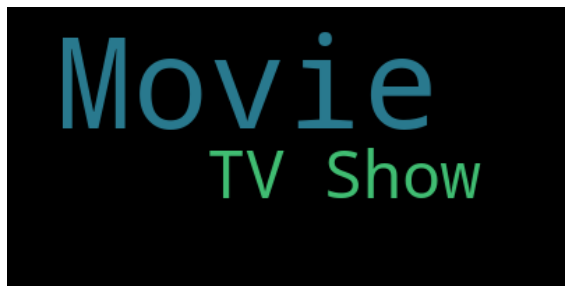

Looking for insights from title of Movies/TV Shows


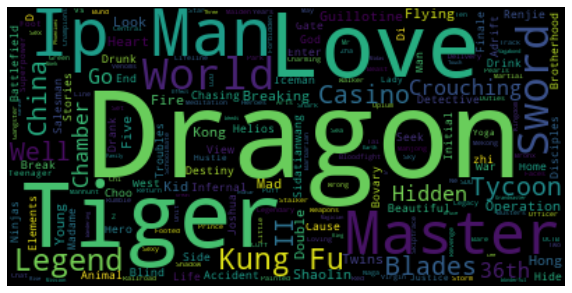

Looking for insights from country of Movies/TV Shows


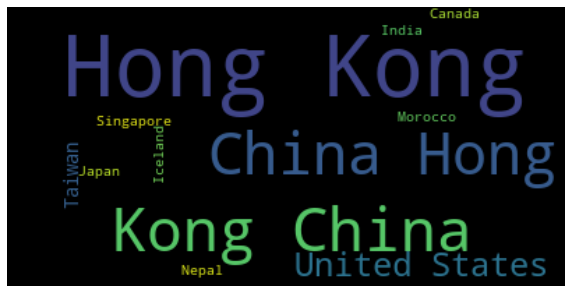

Looking for insights from rating of Movies/TV Shows


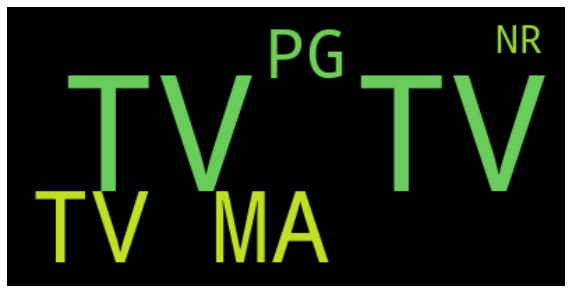

Looking for insights from genres of Movies/TV Shows


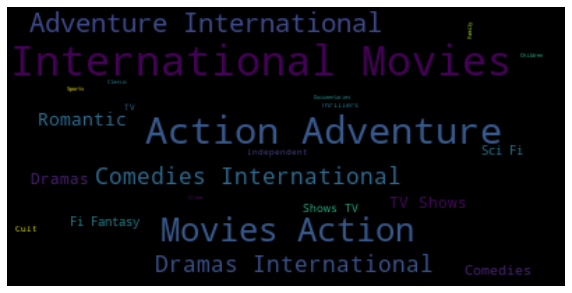

Looking for insights from description of Movies/TV Shows


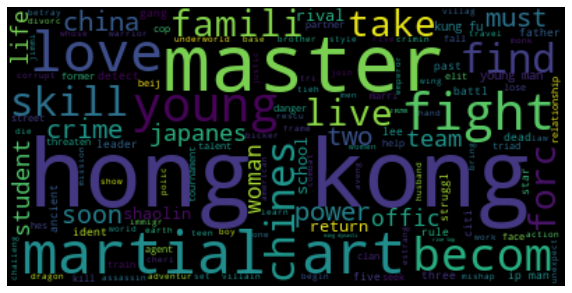

In [263]:
word_count(4)

Analysis of cluster 4

Type - TV Shows

Title- Power rangers, adventure, stories, rescue, bheem, little, monster

Countries- US, France, UK, Japan

Ratings- TV-Y7

Genres- Kids shows-comedy,korean

Description-adventure, friend, world, anime

#Cluster 0

Exploring Cluster 0
Looking for insights from type of Movies/TV Shows


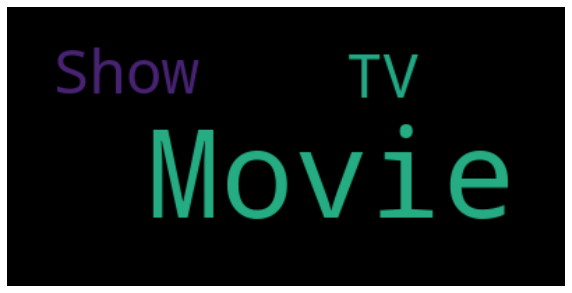

Looking for insights from title of Movies/TV Shows


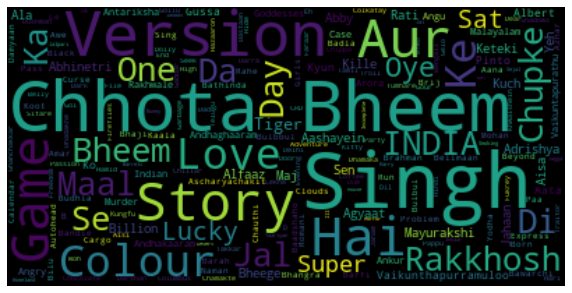

Looking for insights from country of Movies/TV Shows


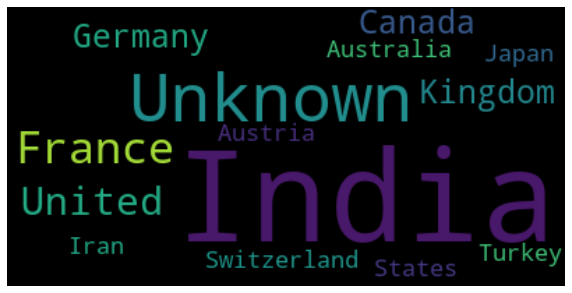

Looking for insights from rating of Movies/TV Shows


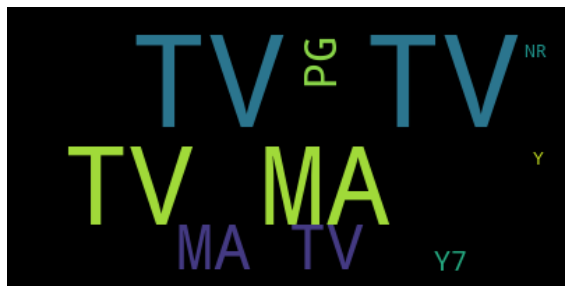

Looking for insights from genres of Movies/TV Shows


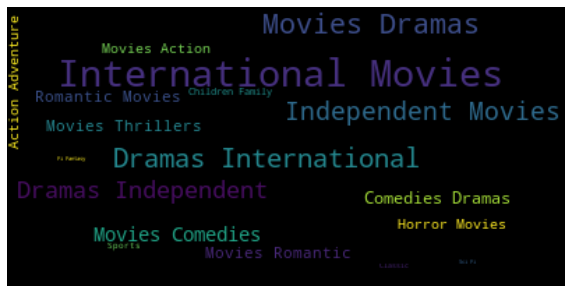

Looking for insights from description of Movies/TV Shows


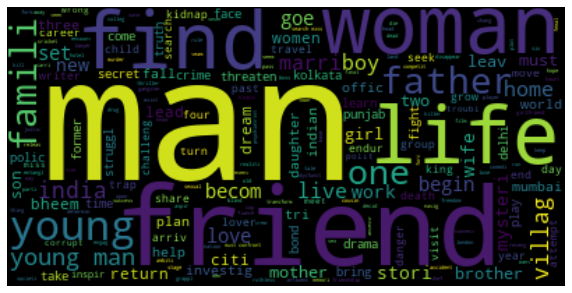

In [264]:
word_count(0)

Analysis of cluster 0 Type - TV Shows

Title- Naruto, high, girl, low, movie, dragon, bleach, fate, battle

Countries- Japan, US

Ratings- TV-MA, PG, Y7

Genres- International TV series- Anime

Description- young, world, human, friend

#Cluster 2

Exploring Cluster 2
Looking for insights from type of Movies/TV Shows


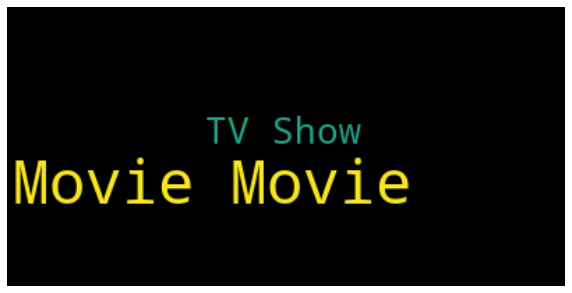

Looking for insights from title of Movies/TV Shows


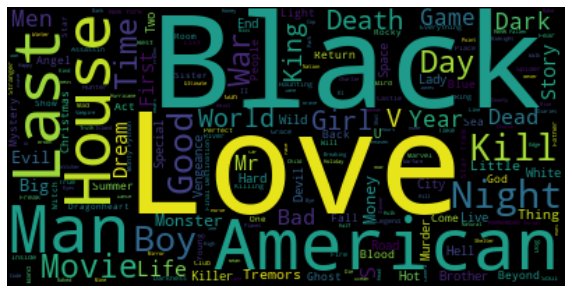

Looking for insights from country of Movies/TV Shows


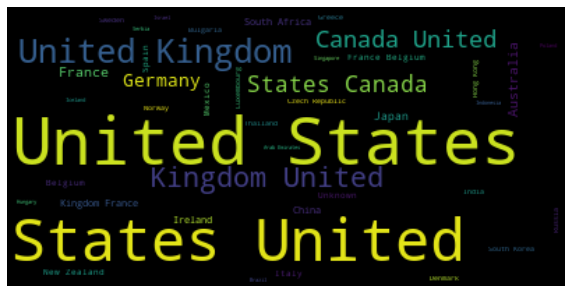

Looking for insights from rating of Movies/TV Shows


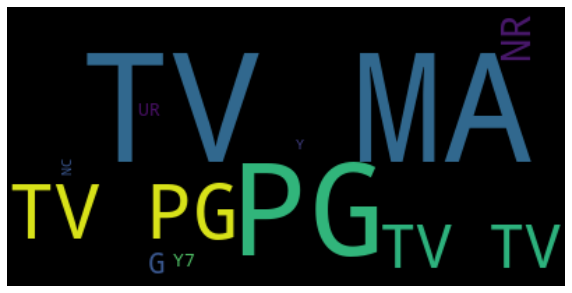

Looking for insights from genres of Movies/TV Shows


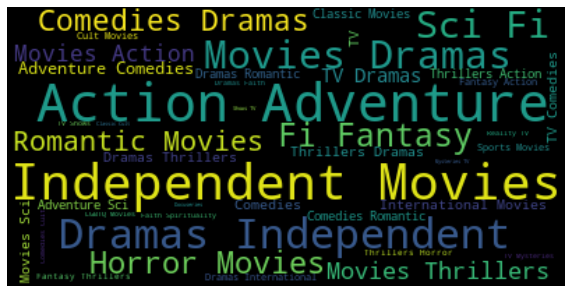

Looking for insights from description of Movies/TV Shows


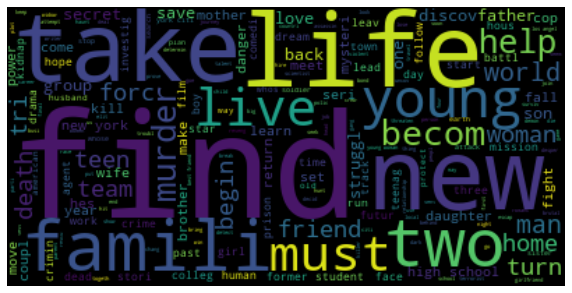

In [265]:
word_count(2)

Analysis of cluster 2 
Type - Movies

Title- Remastered, christmas, live, music, tour, sessions

Countries- US, India, UK

Ratings- TV-MA

Genres- Musical International movies, documetaries

Description- music, documentaries, band, doc, life, love, perform

#cluster 1

Exploring Cluster 1
Looking for insights from type of Movies/TV Shows


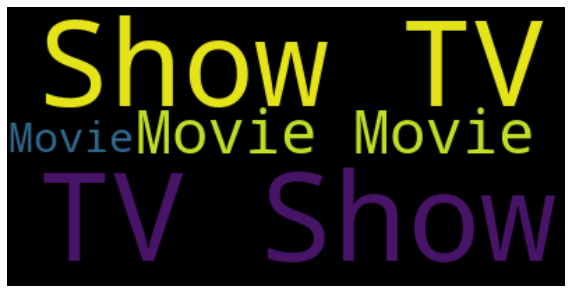

Looking for insights from title of Movies/TV Shows


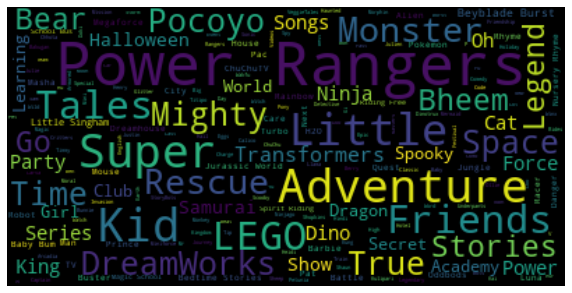

Looking for insights from country of Movies/TV Shows


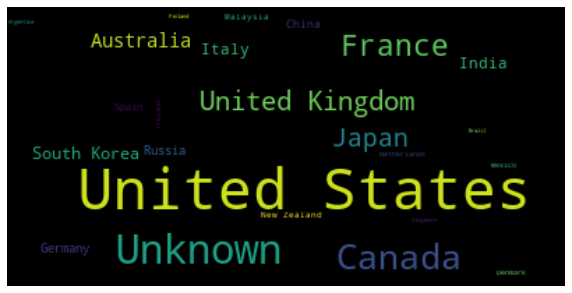

Looking for insights from rating of Movies/TV Shows


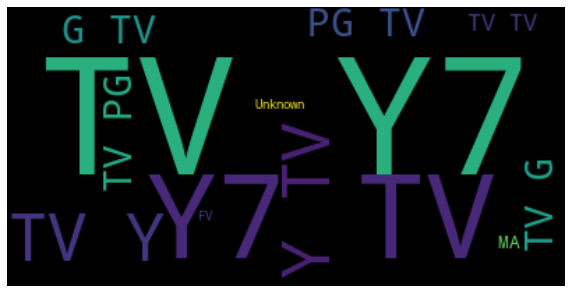

Looking for insights from genres of Movies/TV Shows


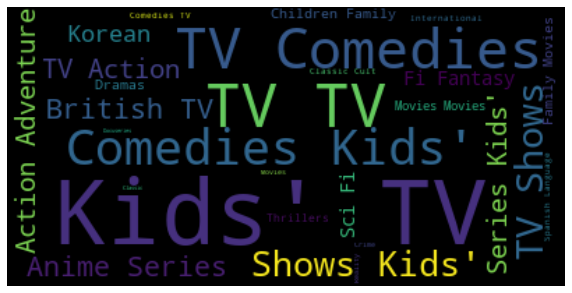

Looking for insights from description of Movies/TV Shows


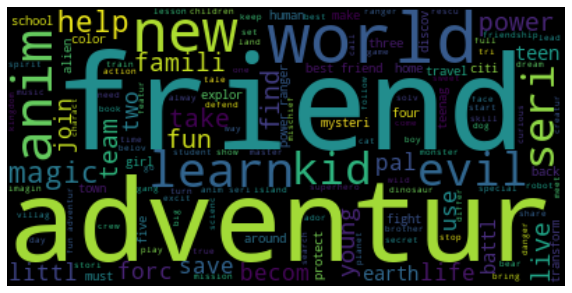

In [266]:
word_count(1)

Analysis of cluster 1

Type - Movies

Title- Hai, ki, dil, aur, mumbai, singh

Countries- India

Ratings- TV-MA

Genres- International movies, Dramas

Description- family, man, love, india, woman, find

#cluster 3

Exploring Cluster 3
Looking for insights from type of Movies/TV Shows


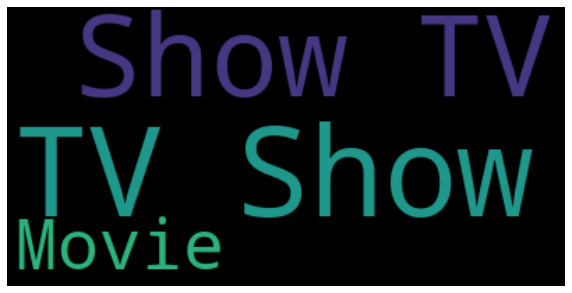

Looking for insights from title of Movies/TV Shows


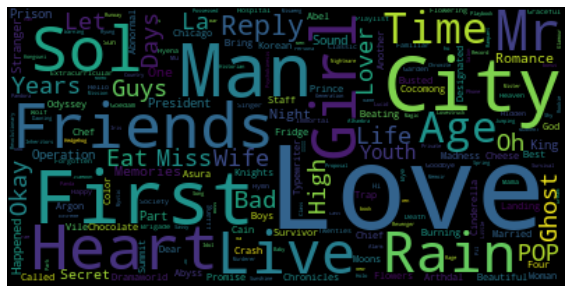

Looking for insights from country of Movies/TV Shows


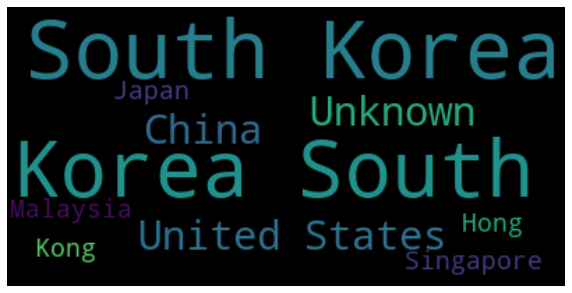

Looking for insights from rating of Movies/TV Shows


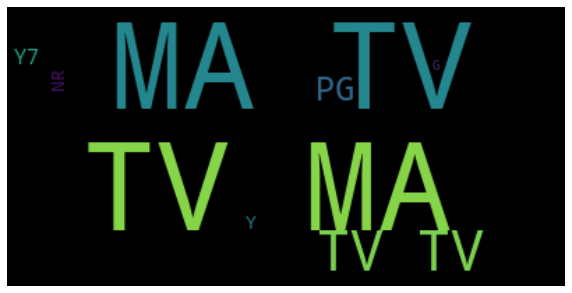

Looking for insights from genres of Movies/TV Shows


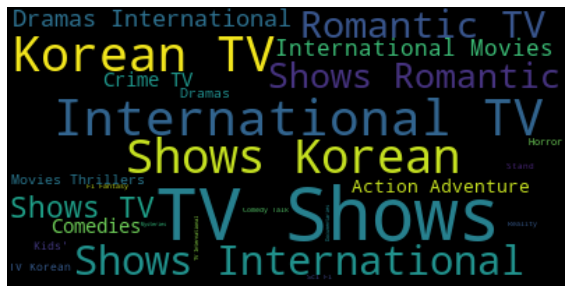

Looking for insights from description of Movies/TV Shows


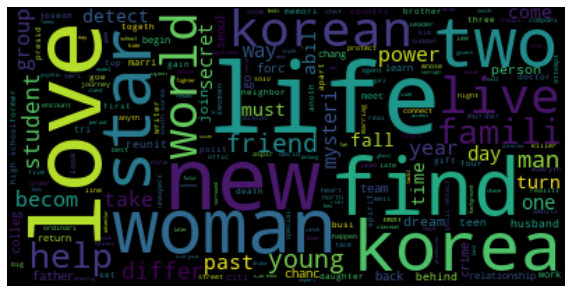

In [267]:
word_count(3)

Analysis of cluster 3

Type - Movies

Title- Girl, man, love, wedding, mother, ghost

Countries- spaine, France, Turkey

Ratings- TV-MA

Genres- International movies, Dramas

Description- find, love, life, friend, family, young

#cluster 6

Exploring Cluster 6
Looking for insights from type of Movies/TV Shows


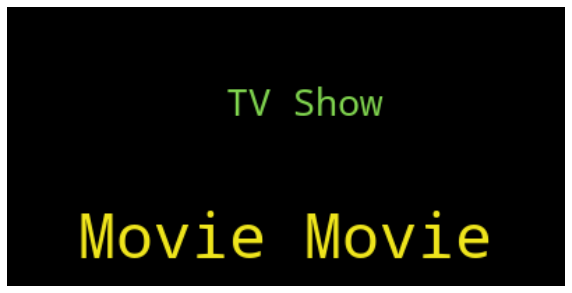

Looking for insights from title of Movies/TV Shows


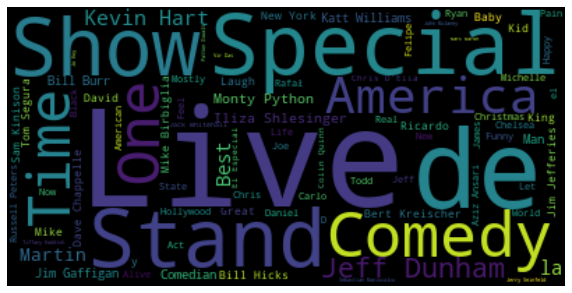

Looking for insights from country of Movies/TV Shows


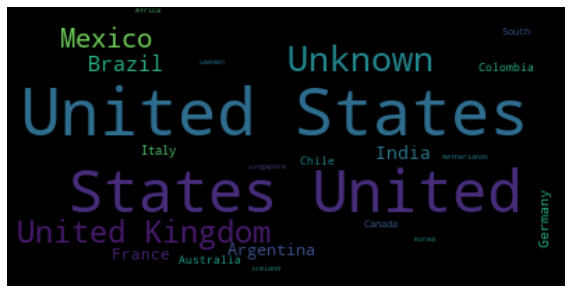

Looking for insights from rating of Movies/TV Shows


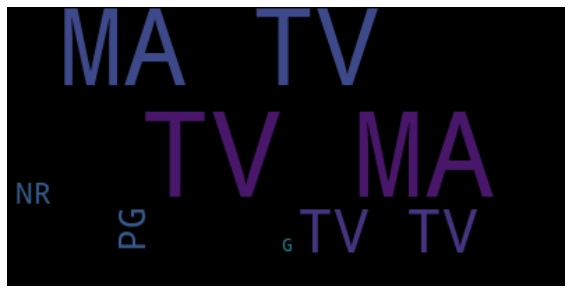

Looking for insights from genres of Movies/TV Shows


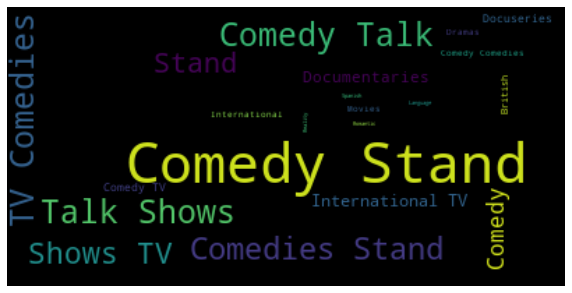

Looking for insights from description of Movies/TV Shows


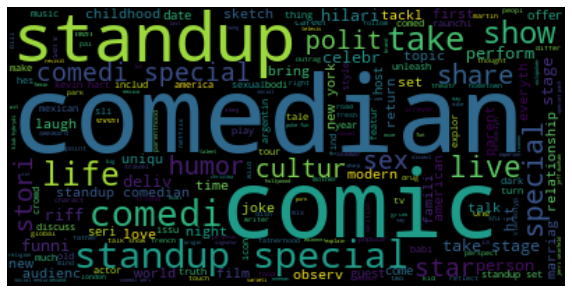

In [268]:
word_count(6)

Analysis of cluster 6

Type - TV Shows

Title- world, killer, nature, murder, inside, history, story

Countries- US, UK

Ratings- TV-MA

Genres-Documentary International TV shows

Description- explore, documentary, series, world, reveal

#cluster 5


Exploring Cluster 5
Looking for insights from type of Movies/TV Shows


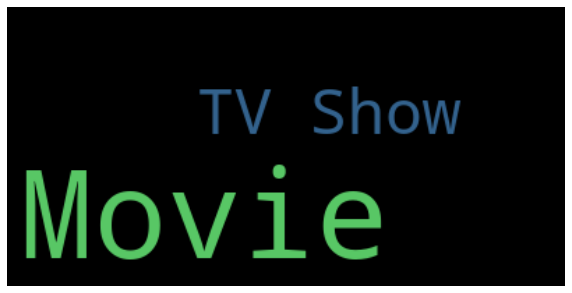

Looking for insights from title of Movies/TV Shows


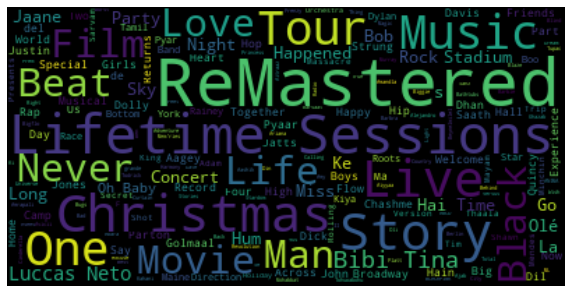

Looking for insights from country of Movies/TV Shows


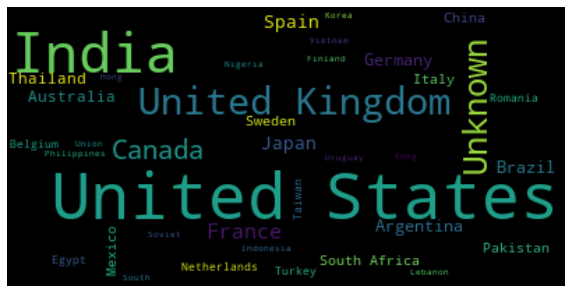

Looking for insights from rating of Movies/TV Shows


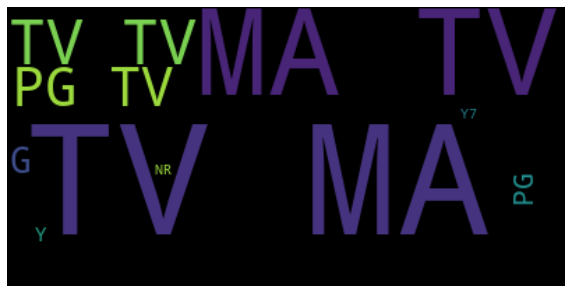

Looking for insights from genres of Movies/TV Shows


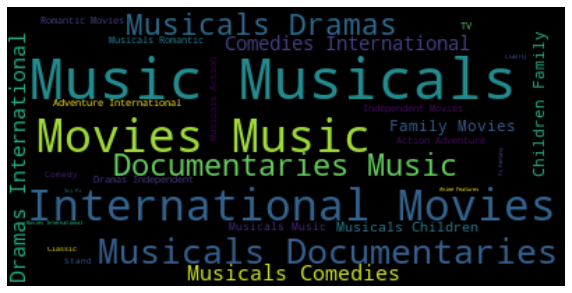

Looking for insights from description of Movies/TV Shows


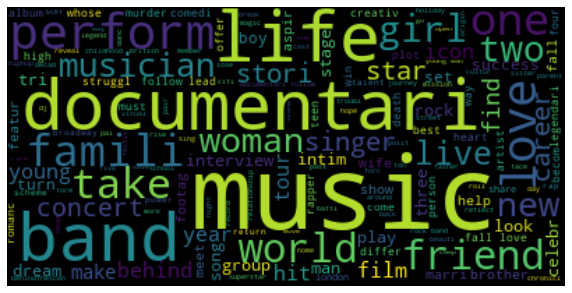

In [269]:
word_count(5)

Analysis of cluster 5



Type - Movies

Title- Love, house, night, man, last, time, girl

Countries- US, UK, canada

Ratings- TV-MA

Genres- Independent movies-comedies,romantic,horror

Description-life, new, family, find, two, young




#cluster 8

Exploring Cluster 8
Looking for insights from type of Movies/TV Shows


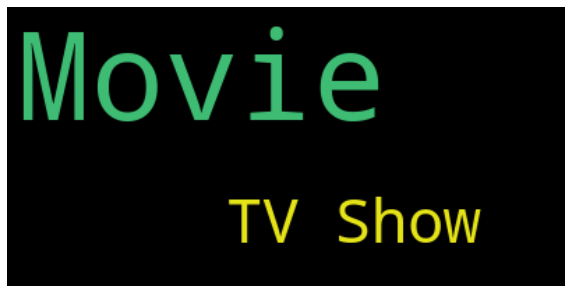

Looking for insights from title of Movies/TV Shows


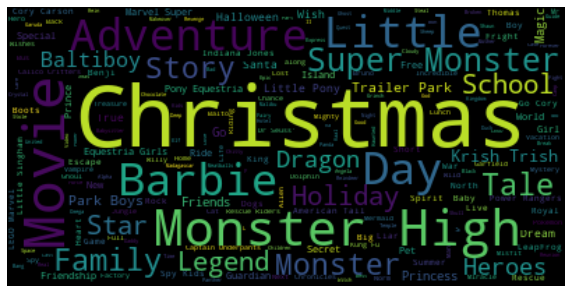

Looking for insights from country of Movies/TV Shows


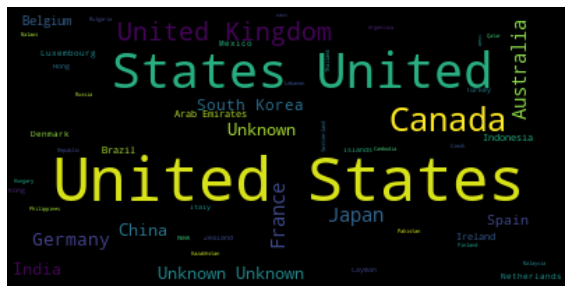

Looking for insights from rating of Movies/TV Shows


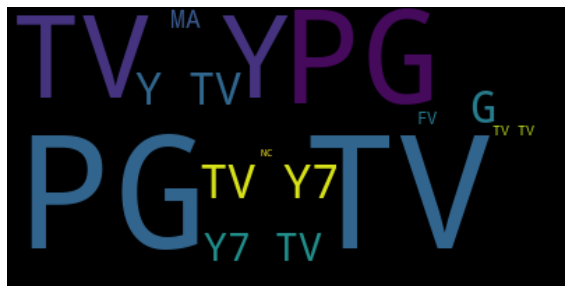

Looking for insights from genres of Movies/TV Shows


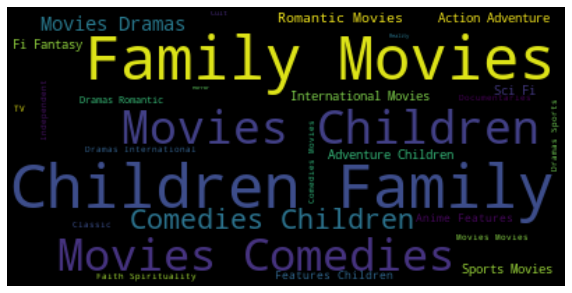

Looking for insights from description of Movies/TV Shows


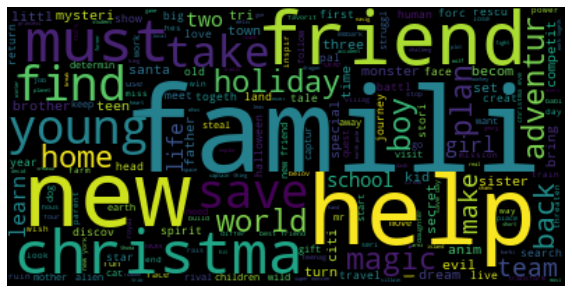

In [270]:
word_count(8)

Analysis of cluster 8

Type - Movies

Title- war, kill, black, world, dragon, last

Countries- US, UK, Hogkong

Ratings- TV-MA, TV-PG

Genres-Action Adventure, sci-fi fantasy

Description- find, take, team, must, force, save, young cop, group

#Clustering similar content by matching text-based features

#Feature Engineering
we will add all text based or categorical columns

In [271]:
# We will add all categorical and text based columns
df_1['text_info'] = df_1['description'] + ' '+ df_1['genres'] + ' ' + df_1['rating'] + ' '+ df_1['country']+ ' ' + df_1['title'] + ' '+ df_1['director'] + ' ' 

In [272]:
# Checking 
df_1['text_info'][0]

'futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalor International TV Shows, TV Dramas, TV Sci-Fi & Fantasy TV-MA Brazil 3% Unknown '

#Text cleaning

In [273]:
#text cleaning function
import re
def clean_text(x):
    return re.sub(r"[^a-zA-Z ]","",str(x))

In [274]:
#Applying above function on our combined column
df_1['text_info'] = df_1['text_info'].apply(clean_text)

In [275]:
#we will convert all words in lowercase
df_1['text_info'] = df_1['text_info'].str.lower()

In [276]:
#necessary import for nlp
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#Stemming-

In [277]:
#stemming
stemmer = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))

In [ ]:
# defining a function to filter the words
def filter_words(string, filter_words):
  filtered=[]
  tokens = word_tokenize(string)
  for word in tokens:
    if word not in filter_words:
      filtered.append(stemmer.stem(word))
  return filtered

df_1['cleaned_text']= ''
for item, row in df_1.iterrows():
  df_1.at[item,'cleaned_text'] = filter_words(row['text_info'],stop_words)

df_1['cleaned_text']

In [ ]:
#join words fun
def join_words(x):
  return " ".join(x)

In [ ]:
#final column
df_1['cleaned_text'] = df_1['cleaned_text'].apply(join_words)

In [ ]:
df_1.head()

In [ ]:
words = df_1.cleaned_text

#TF-IDF
Term frequency-inverse document frequency is a text vectorizer that transforms the text into a usable vector.

TF - The term frequency is the number of occurrences of a specific term in a document. Term frequency indicates how important a specific term in a document. Term frequency represents every text from the data as a matrix whose rows are the number of documents and columns are the number of distinct terms throughout all documents.

IDF - Document frequency is the number of documents containing a specific term. Document frequency indicates how common the term is.Inverse document frequency (IDF) is the weight of a term, it aims to reduce the weight of a term if the term’s occurrences are scattered throughout all the documents.

In [ ]:
#using tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
t_vectorizer = TfidfVectorizer(max_df = 0.9,min_df = 1, max_features=15000)
X= t_vectorizer.fit_transform(words)

In [ ]:
X

#Applying PCA-Principal Component Analysis to reduce dimensions.
PCA stands for Principal Component Analysis.

Principal Component Analysis is an unsupervised learning approach used in machine learning to reduce dimensionality. It is a statistical procedure that uses orthogonal transformation to turn observations of correlated features into a set of linearly uncorrelated data.


It is a method for extracting strong patterns from a given dataset by decreasing variances.

PCA often seeks the lower-dimensional surface onto which to project the high-dimensional data.

In [ ]:
#PCA Code
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
transformer = PCA()
transformer.fit(X.toarray())

#Cumulative Explained Variance

In [ ]:
 #explained var v/s comp
plt.plot(np.cumsum(transformer.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')


here we can clearly spot that 80% variance is explained by 3000 components only.

We will use 3000 components

In [ ]:
#choosing right dim from plot, this might take a while, for ready ans use n_components = 3000
from sklearn.decomposition import PCA
transformer = PCA(n_components=3000)
transformer.fit(X.toarray())
X_transformed = transformer.transform(X.toarray())
X_transformed.shape

In [ ]:
#vectorizing the test and train
X_vectorized = t_vectorizer.transform(words)

In [ ]:
#applying pca
X= transformer.transform(X_vectorized.toarray())

In [ ]:
X

#KMeans Clustering

K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters.

It is an iterative algorithm that divides the unlabeled dataset into k different clusters in such a way that each dataset belongs only one group that has similar properties.

It is a centroid-based algorithm, where each cluster is associated with a centroid. The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.

Silhouette Score Elbow for KMeans Clustering

In [ ]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer


# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(4,22), metric='silhouette', timings=False
)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()  

#Elbow Method to get number of clusters
The K-Elbow Visualizer implements the “elbow” method of selecting the optimal number of clusters for K-means clustering.

The elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters. By default, the distortion score is computed, the sum of square distances from each point to its assigned center.

When these overall metrics for each model are plotted, it is possible to visually determine the best value for k. If the line chart looks like an arm, then the “elbow” (the point of inflection on the curve) is the best value of k. The “arm” can be either up or down, but if there is a strong inflection point, it is a good indication that the underlying model fits best at that point.



In [ ]:
# We will plot the graph to get the no. of clusters
wcss = []
for i in range(1, 22):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 22), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
     

we will take no. of clusters as 15

#Model fitting


In [ ]:
#fitting the k means algorithm on lower features

kmeans= KMeans(n_clusters=15, init= 'k-means++',max_iter=300, n_init=1)
kmeans.fit(X)

calculating silhouette score

In [ ]:
from sklearn.metrics import silhouette_score
print("Silhouette Coefficient:  %0.3f"%silhouette_score(X, kmeans.labels_))

In [ ]:
#predict the labels of clusters.
label = kmeans.fit_predict(X)

In [ ]:
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.rcParams["figure.figsize"] = (20,8)
plt.legend()
plt.show()


In our dataset, we now allocate our clusters by adding a new column called "clusters."

In [ ]:
#Assigning clusters to our data
df_1['clusters'] = kmeans.labels_

In [ ]:
# checking how it is working
df_1.head()

#Counting Movies/TV shows assigned to each cluster

In [ ]:
# COunting content in each cluster
cluster_content_count = df_1['clusters'].value_counts().reset_index().rename(columns={'index':'clusters','clusters':'Movies/TV_Shows'})
cluster_content_count
     

#Contentwise clusters

In [ ]:
#word cloud imports
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#Defining a function to explore all the cluster using word cloud

In [ ]:

#word cloud for user rating review
def word_count(category):
  print("Exploring Cluster", category)
  col_names = ['type','title','country','rating','genres','description']
  for i in col_names:
    df_word_cloud = df_1[['clusters',i]].dropna()
    df_word_cloud = df_word_cloud[df_word_cloud['clusters']==category]
    text = " ".join(word for word in df_word_cloud[i])
    # Create stopword list:
    stopwords = set(STOPWORDS)
  # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
  # Display the generated image:
  # the matplotlib way:
    plt.rcParams["figure.figsize"] = (10,6)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    
    print("Looking for insights from", i ,"of Movies/TV Shows")
    plt.show()

#Conclusion

1. In the cumulative explained variance graph, we found that 3000 components captured 80% of the variance, so we chose 3000 as the number of components.

2. Using the Elbow approach, we chose 15 clusters.

3. Determined the silhouette score for 15 clusters, which was 0.008

4. We then used KMeans to predict the labels on our data.

5. We create a word cloud for each cluster to illustrate the summary of each cluster.

6. We then plotted the average silhouette score for clusters ranging from 2 to 16, and we got silhouette score 0.00708 for cluster=15, which is quite close to what we determined earlier.

#Limitations

1. As the number of dimensions rises, a distance-based similarity measure between every feature converges to a constant value.

2. Outliers can drag centroids, or outliers can form their own cluster instead of being ignored.

3. Additional computational power is necessary.

4. k-means has difficulty grouping data with varied cluster sizes and densities.

#Future Scope

1. With additional processing capacity, we can work on more data.

2. Can use various clustering techniques.